In [29]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import os
import cv2

from tqdm import tqdm
import random
from random import shuffle
import numpy as np         # dealing with arrays
# import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.image import imread
from os import makedirs
from os import listdir
from imutils import paths
from random import seed
from random import random
from sklearn.metrics import confusion_matrix
from random import random, shuffle
import pathlib

In [30]:
 print(tf.__version__)

2.19.0


# Just checking we are in right directory by displaying some images

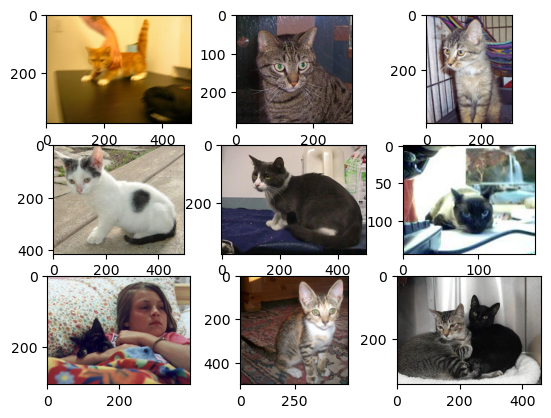

In [31]:
# define location of dataset
cat_folder = 'data/Cat/'
dog_folder = 'data/Dog/'
#plot first few images
for i in range(9):
    
    # define subplot
    plt.subplot(330 + 1 + i)
    # define filename
    filename = cat_folder +  str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()


# Creating Data Directories
## This task has been done in prvious workshop. If your wk8.ipynb file is in the same folder as wk7.ipynb, skip this

In [32]:
# this task has been done for previous workshop. if your wk7.ipynb file is in the same folder as wk6.ipynb, skip this 
#otherwise continue through this
dataset_home = 'dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
        

# This task has been done for prvious workshop. If your wk8.ipynb file is in the same folder as wk7.ipynb, skip this 

In [33]:
# this task has been done for prvious workshop. if your wk8.ipynb file is in the same folder as wk7.ipynb, skip this 
#otherwise continue through this
# seed random number generator
seed(1)
# define ratio of pictures to use for unseen test subset
val_ratio = 0.25 
# copy training dataset images into subdirectories
#src_directory = 'train/'
for file in listdir(cat_folder):
    if file.endswith('jpg'):
        src = cat_folder  + file
        dst_dir = 'dogs_vs_cats/train/cats/'
        if random() < val_ratio:
            dst_dir = 'dogs_vs_cats/test/cats/'
        photo = load_img(src, target_size=(200, 200))
        photo.save(dst_dir+file)
for file in listdir(dog_folder):
    if file.endswith('jpg'):
        src = dog_folder  + file
        dst_dir = 'dogs_vs_cats/train/dogs/'
        if random() < val_ratio:
            dst_dir = 'dogs_vs_cats/test/dogs/'
        photo = load_img(src, target_size=(200, 200))
        photo.save(dst_dir+file)
    

In [34]:
IMG_SIZE=64
ROWS = 256
COLS = 256
CHANNELS = 3
batch_size=16
Data_dir='dogs_vs_cats/train'

Test_DIR='dogs_vs_cats/test'


# Step#2   Choose number of training Samples

# keep  validation_split=0.8 just for one complete go till the end of this workshop just to have an idea, after completion, set it to 0.2
 # validation_split=0.8 , this will take less training data, so that our model training could have been done in time of lab duration

In [35]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  Data_dir,
  validation_split=0.8, #0.2 
  subset="training",#20%-80% of data for training
  seed=123,
  image_size=(ROWS, COLS),
  batch_size=batch_size)



Found 18697 files belonging to 2 classes.
Using 3740 files for training.


In [36]:
#images for validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  Data_dir,
  validation_split=0.2, #20% of data for valifation
  subset="validation",
  seed=123,
  image_size=(ROWS, COLS),
  batch_size=batch_size)




Found 18697 files belonging to 2 classes.
Using 3739 files for validation.


In [37]:
test_images =  list(paths.list_images(Test_DIR))
len(test_images)

6301

# Sample from datalaoder

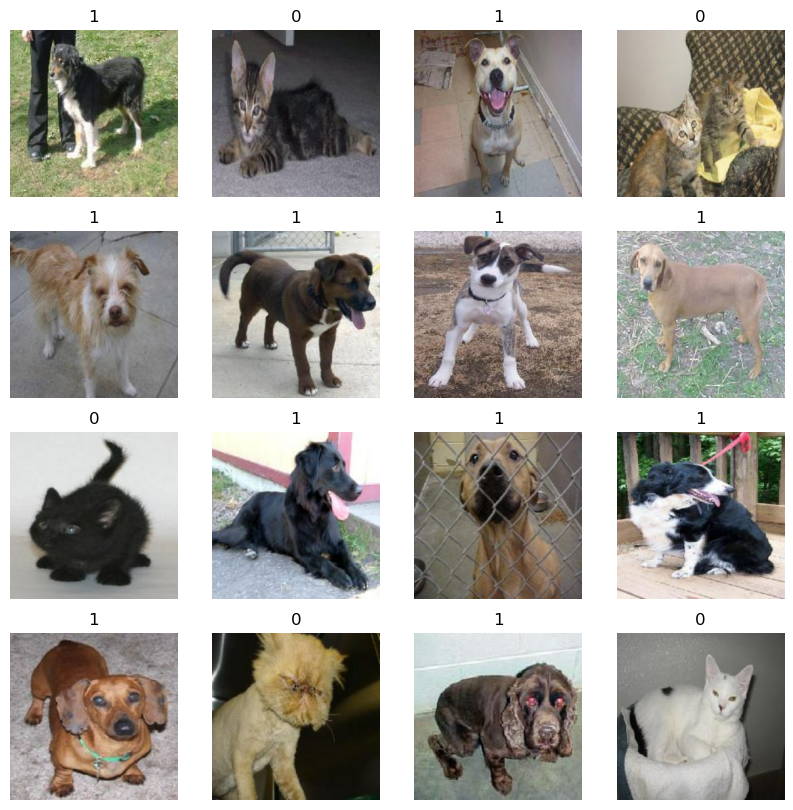

In [38]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# 1= Dog   ; 0=Cat

#  The Data

In [39]:


print("Train shape: {}".format(images[1].shape))
class_names = train_ds.class_names
print(class_names)


Train shape: (256, 256, 3)
['cats', 'dogs']


# step 3 **here you can change epochs and data_augmentation**

In [40]:

num_classes = 2
epochs = 5 #50 #100
data_augmentation = False #True


#  step 4 Your CNN

In [41]:
from tensorflow.keras import layers, models
from tensorflow import keras

if not data_augmentation:
    print('Not using data augmentation.')

    model = keras.Sequential([
        layers.Rescaling(1./255, input_shape=(ROWS, COLS, 3)),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        # layers.Conv2D(32, 3, padding='same', activation='relu'),
        # layers.MaxPooling2D(),
        # layers.Conv2D(64, 3, padding='same', activation='relu'),
        # layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
    ])

else:
    print('Using real-time data augmentation.')

    data_augmentation = keras.Sequential([
        layers.RandomFlip("horizontal", input_shape=(ROWS, COLS, 3)),
        layers.RandomRotation(0.2)
    ])

    model = keras.Sequential([
        data_augmentation,
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        # layers.Conv2D(32, 3, padding='same', activation='relu'),
        # layers.MaxPooling2D(),
        # layers.Conv2D(64, 3, padding='same', activation='relu'),
        # layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
    ])

Not using data augmentation.


In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
# history = LossHistory()  
#why we need early stopping? So that we can stop training when there is no further increase in performance as 
#per certain criteria

In [43]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      33,554,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,555,266 (128.00 MB)

 Trainable params: 33,555,266 (128.00 MB)

 Non-trainable params: 0 (0.00 B)

# Step 5 Training

In [44]:

# This callback will stop the training when there is no improvement in
# the loss for 5 consecutive epochs.

callback =tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.0000001, patience=5)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks=[callback]
)


Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 113s 462ms/step - accuracy: 0.5437 - loss: 5.5872 - val_accuracy: 0.5635 - val_loss: 0.8404
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 140s 454ms/step - accuracy: 0.6565 - loss: 0.6305 - val_accuracy: 0.6026 - val_loss: 0.7242
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 150s 488ms/step - accuracy: 0.7638 - loss: 0.4949 - val_accuracy: 0.6748 - val_loss: 0.6255
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 118s 504ms/step - accuracy: 0.8613 - loss: 0.3597 - val_accuracy: 0.6871 - val_loss: 0.6707
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 145s 515ms/step - accuracy: 0.9051 - loss: 0.2634 - val_accuracy: 0.6750 - val_loss: 0.7371


In [45]:

#model.save('saved_model')
model.save('saved_model.keras')





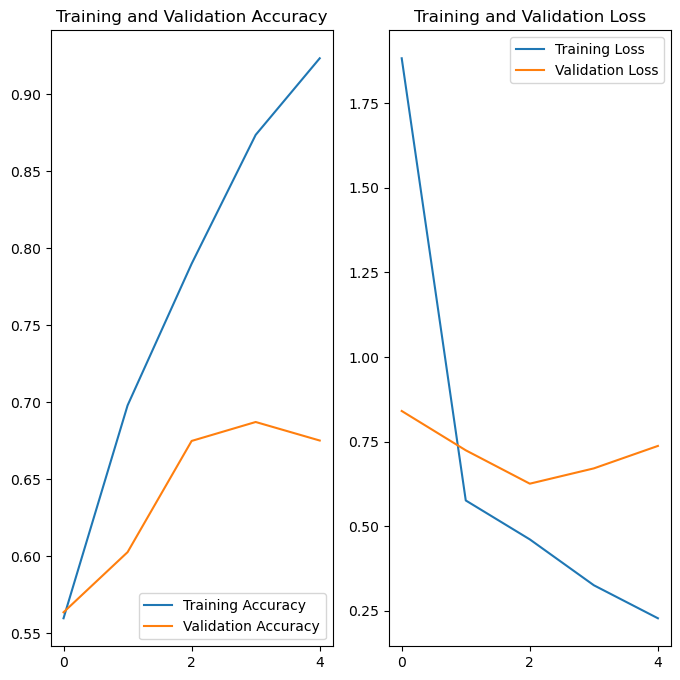

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot( val_acc, label='Validation Accuracy')
plt.xticks(range(0,epochs)[0::2])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xticks(range(0,epochs)[0::2])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Step 6 Testing

In [47]:
#images for Testing
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  Test_DIR,
  validation_split=0.0,
  seed=123,
  image_size=(ROWS, COLS),
  batch_size=batch_size)


Found 6301 files belonging to 2 classes.


# Test Loss and Accuracy

In [48]:
model.evaluate(test_ds) 

394/394 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.6677 - loss: 0.7672


[0.7453137040138245, 0.6719568371772766]

## layers names

In [49]:
model_layers = [ layer.name for layer in model.layers]  #laeyrs
print(model_layers)


['rescaling_1', 'conv2d_1', 'max_pooling2d_1', 'flatten_1', 'dense_2', 'dense_3']


## Prediction results of some test images

In [50]:
y_test=[]
y_pred=[]
for images, labels in test_ds.take(10):
   
        
        predictions = model.predict(images)
        score = tf.nn.softmax(predictions)
        y_test.append(labels)
        y_pred.append(np.argmax(score,axis=1))
        
        
                            
        
        
       

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [51]:
y_pred

[array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64),
 array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64),
 array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64),
 array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64),
 array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64),
 array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64),
 array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64),
 array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)]

In [52]:
y_test

[<tf.Tensor: shape=(16,), dtype=int32, numpy=array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0])>,
 <tf.Tensor: shape=(16,), dtype=int32, numpy=array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0])>,
 <tf.Tensor: shape=(16,), dtype=int32, numpy=array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])>,
 <tf.Tensor: shape=(16,), dtype=int32, numpy=array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])>,
 <tf.Tensor: shape=(16,), dtype=int32, numpy=array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])>,
 <tf.Tensor: shape=(16,), dtype=int32, numpy=array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])>,
 <tf.Tensor: shape=(16,), dtype=int32, numpy=array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0])>,
 <tf.Tensor: shape=(16,), dtype=int32, numpy=array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])>,
 <tf.Tensor: shape=(16,), dtype=int32, numpy=array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1])>,
 <tf.Tensor: shape=(16,), dtype=int32, numpy=array([0, 0, 1, 1, 0, 1, 0, 

## Prediction results of some test images from test directory

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
This image most likely belongs to cats with a 91.42 percent confidence.


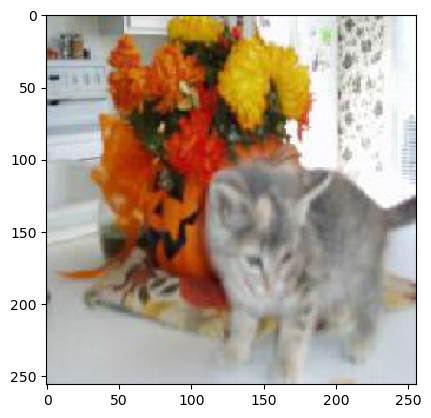

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
This image most likely belongs to dogs with a 98.40 percent confidence.


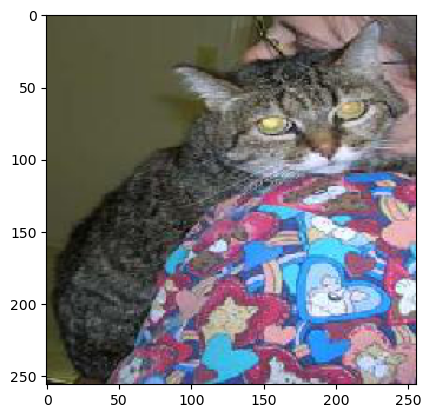

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
This image most likely belongs to dogs with a 86.15 percent confidence.


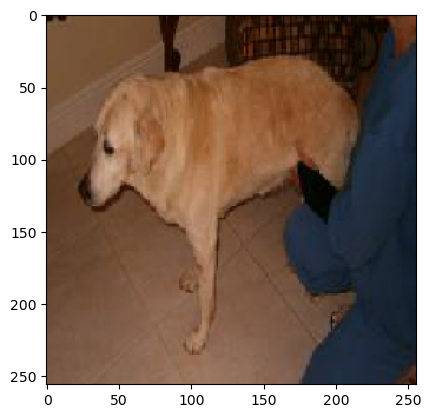

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
This image most likely belongs to dogs with a 59.76 percent confidence.


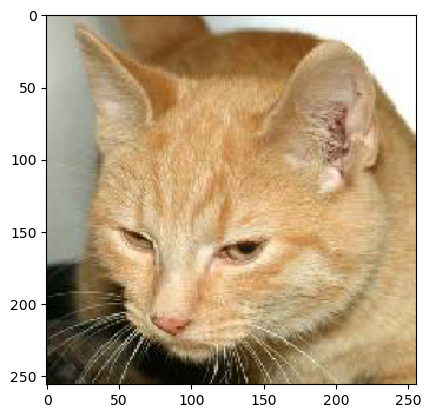

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
This image most likely belongs to cats with a 92.83 percent confidence.


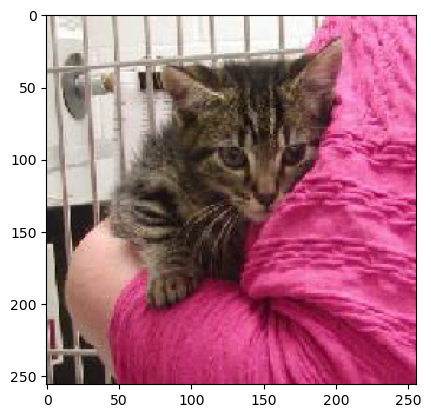

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
This image most likely belongs to dogs with a 99.83 percent confidence.


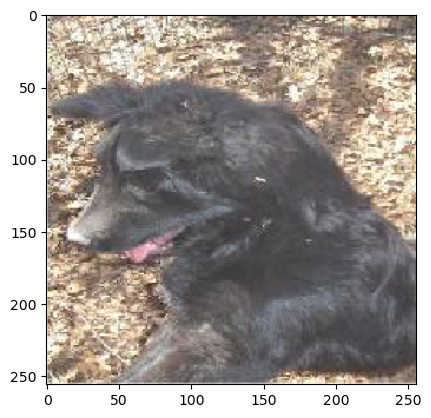

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
This image most likely belongs to dogs with a 100.00 percent confidence.


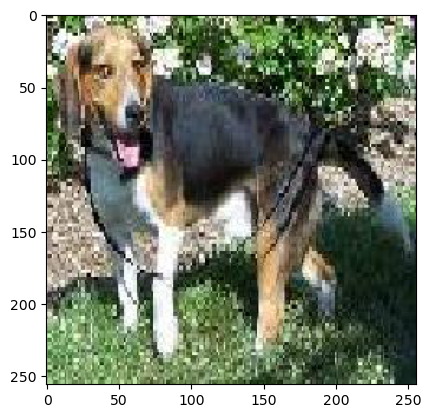

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
This image most likely belongs to dogs with a 73.59 percent confidence.


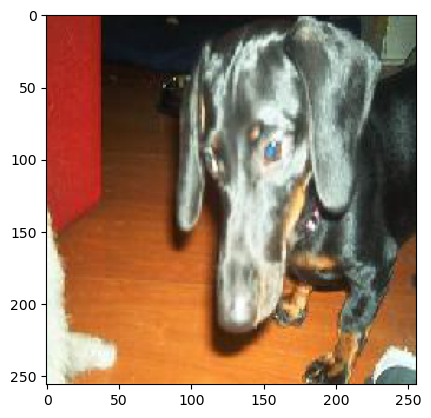

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
This image most likely belongs to cats with a 69.57 percent confidence.


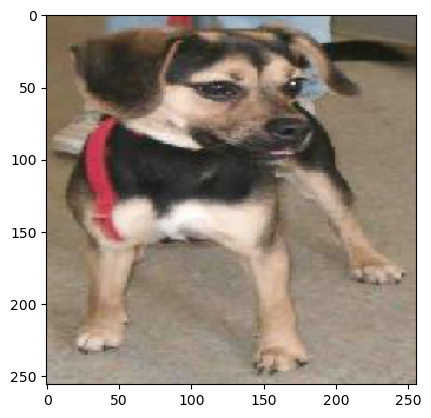

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
This image most likely belongs to dogs with a 89.19 percent confidence.


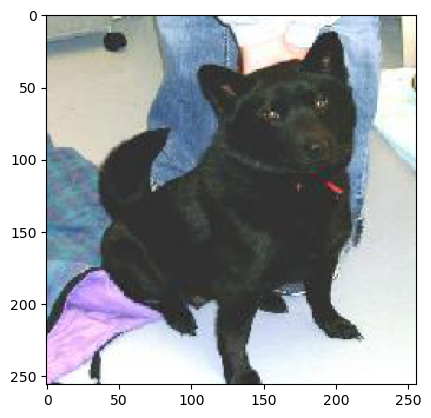

In [53]:
shuffle(test_images)
for i in range(0, 10): # you can increase the range upto 50 to test, rigth now it is 10
    img = keras.preprocessing.image.load_img(
        test_images[i], target_size=(ROWS, COLS)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    plt.imshow(img_array[0,...].numpy().astype("uint8"))

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
   
    plt.show()

In [54]:
class_names

['cats', 'dogs']